In [3]:
import numpy as np

n_rows, n_cols = 100, 100
read_verif_file = lambda folder, i: np.fromfile(folder + '/verification_absorption_' + str(i) + '.wsv', sep=' ').reshape((n_rows + 1, n_cols + 1))[:n_rows, :n_cols].T * 1e-3
read_data_file = lambda folder: np.loadtxt(folder + '/absorption.csv', delimiter=',')


read_folder = lambda folder: [read_data_file(folder)] + [read_verif_file(folder, i) for i in (1, 2)]

results = [read_folder(folder) for folder in ['one_layer_matched', 'one_layer_unmatched', 'three_layer']]

0.00026199999999999835 0.0003166000000000002 1.3592542589797698e-07 1.6406335246925735e-07
0.5229117357322673 0.5229552593409382 0.5236306029229373
6.28417017531719e-05
-0.0001005467228051797


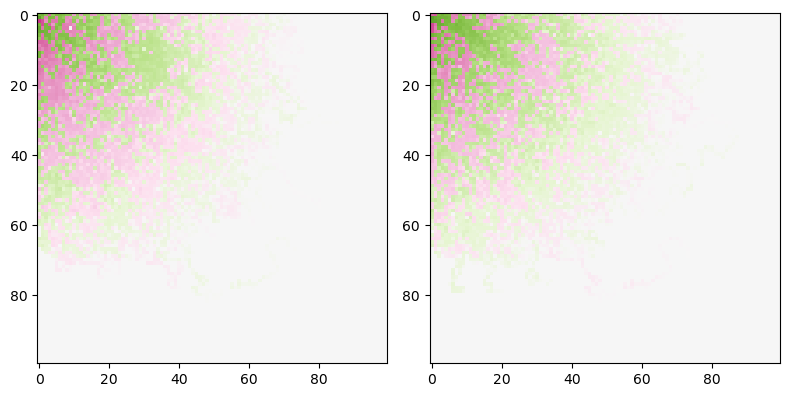

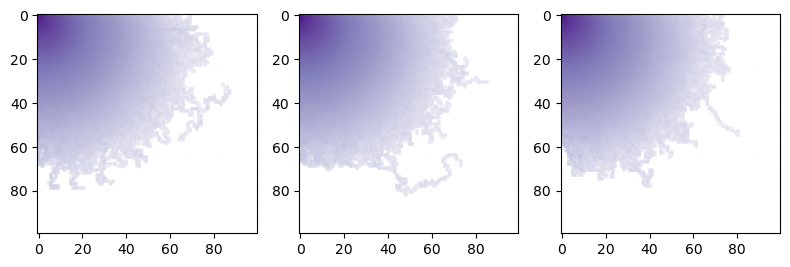

6.0000000000004494e-05 0.00015790000000000248 1.296889420943725e-07 1.6878213824448873e-07
0.5634767055711972 0.5639563396090976 0.56353219505677
0.000312343828086096
0.0007183908045975526


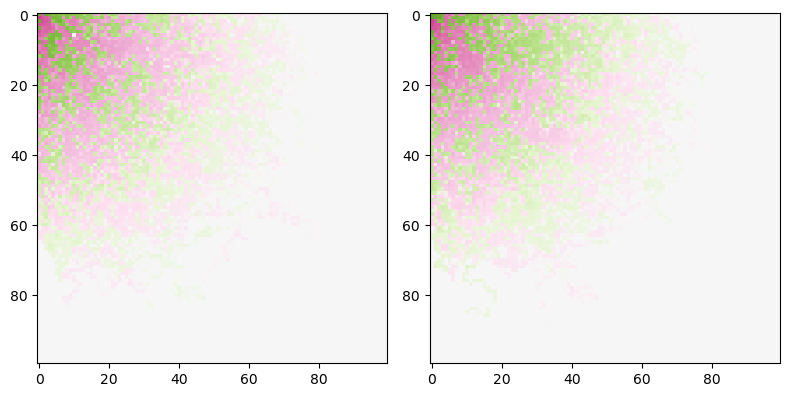

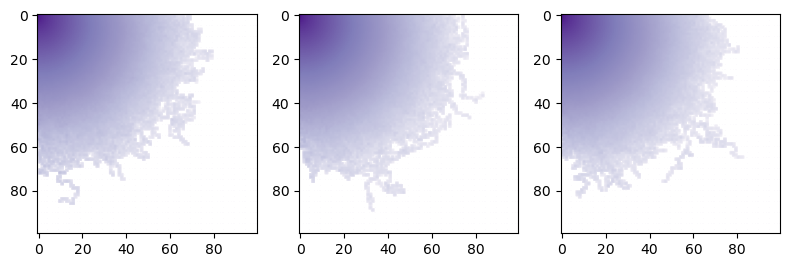

1.1800000000000178e-05 6.739999999999871e-05 4.0130569768242534e-08 8.95560226939094e-08
0.11362286124571326 0.11389205055722632 0.11374973651193221
-0.0010493179433367723
0.0030749577991696113


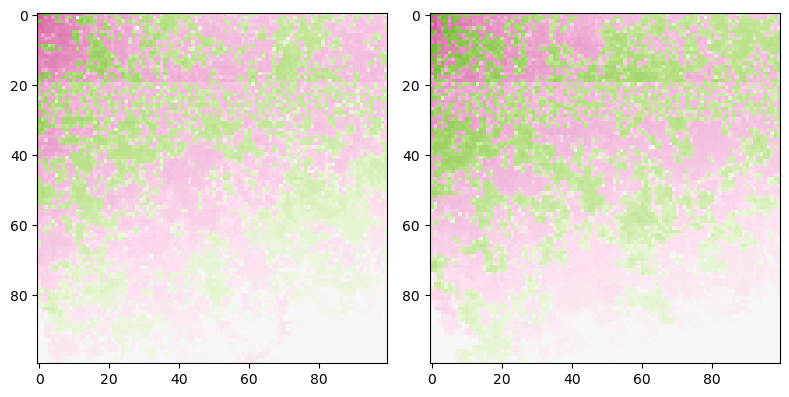

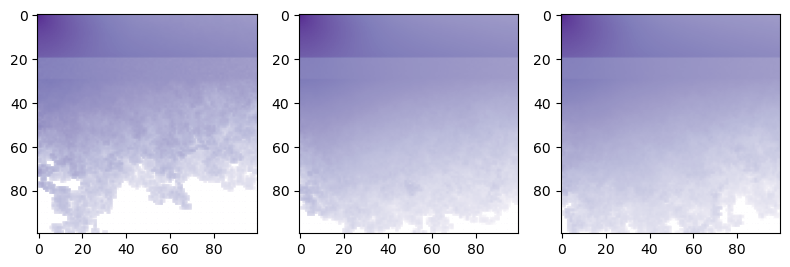

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm, LogNorm
from pylab import cm

for data, verif_1, verif_2 in results:
    verif_diff = (verif_1 - verif_2)
    verif = (data - verif_1)

    print(np.max(verif_diff), np.max(verif), np.average(np.abs(verif_diff)), np.average(np.abs(verif)))
    print(np.sum(verif_1), np.sum(verif_2), np.sum(data))
    print(verif_diff[0, 0] / verif_1[0, 0])
    print(verif[0, 0] / verif_1[0, 0])

    fig, axs = plt.subplots(1, 2, figsize=(8,4))

    norm = SymLogNorm(linthresh=1e-12, linscale=1, vmin=-1, vmax=1)
    axs[0].imshow(verif_diff, cmap="PiYG", norm=norm)
    axs[1].imshow(verif, cmap="PiYG", norm=norm)

    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 8/3))

    norm = LogNorm(vmin=-1, vmax=1)
    axs[0].imshow(data, cmap="Purples", norm=norm)
    axs[1].imshow(verif_1, cmap="Purples", norm=norm)
    axs[2].imshow(verif_2, cmap="Purples", norm=norm)

    plt.tight_layout()
    plt.show()